In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [7]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Text(0.5, 1.0, 'Spam vs Not Spam Count')

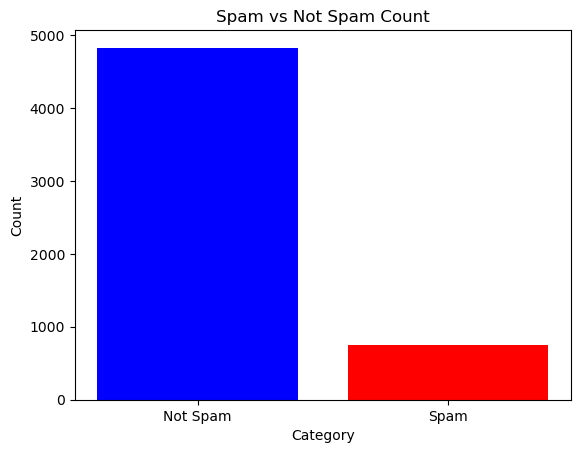

In [29]:
spam_counts = data['Spam'].value_counts()
# Plot the bar chart
plt.bar(spam_counts.index, spam_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Not Spam', 'Spam']) 
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Spam vs Not Spam Count')

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.20)

In [13]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [14]:
model = make_pipeline(CountVectorizer(),MultinomialNB(alpha=1))#applies laplace smoothing

In [15]:
model.fit(X_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB(alpha=1))])

In [16]:
model.score(X_test,y_test)

0.9856502242152466

In [36]:
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,auc

In [32]:
preds = model.predict(X_test)

<Axes: >

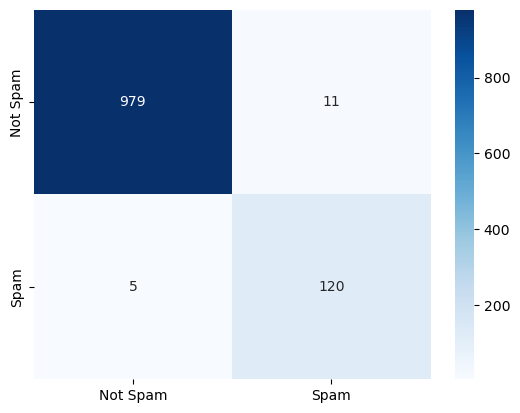

In [34]:
cm = confusion_matrix(preds,y_test)
# Plot the heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

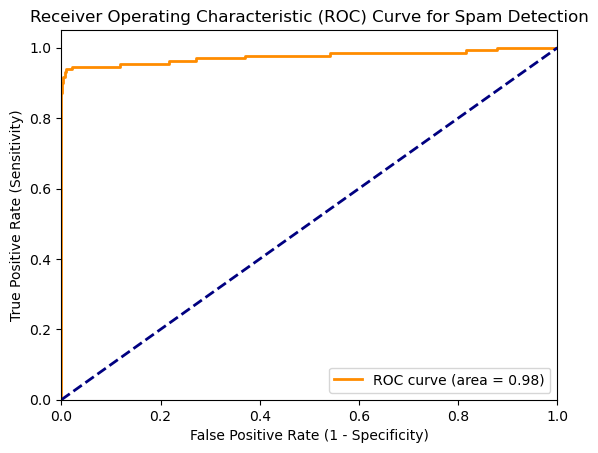

In [37]:
# Get predicted probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class '1' (spam)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Spam Detection')
plt.legend(loc="lower right")
plt.show()

In [50]:
from sklearn.metrics import precision_recall_curve, average_precision_score,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

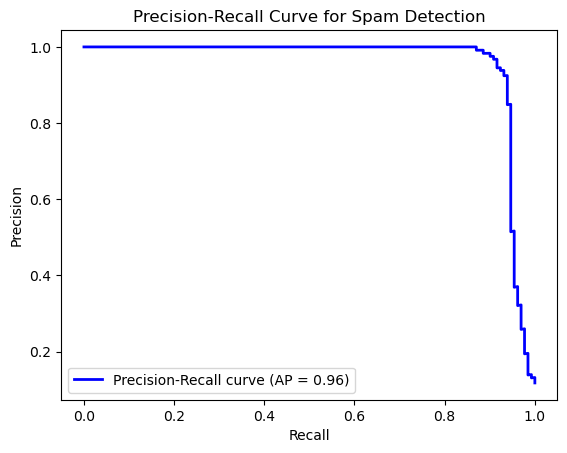

In [39]:
# Calculate the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calculate the average precision score (optional but useful)
average_precision = average_precision_score(y_test, y_prob)

# Plot the precision-recall curve
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Spam Detection')
plt.legend(loc="lower left")

# Show the plot
plt.show()

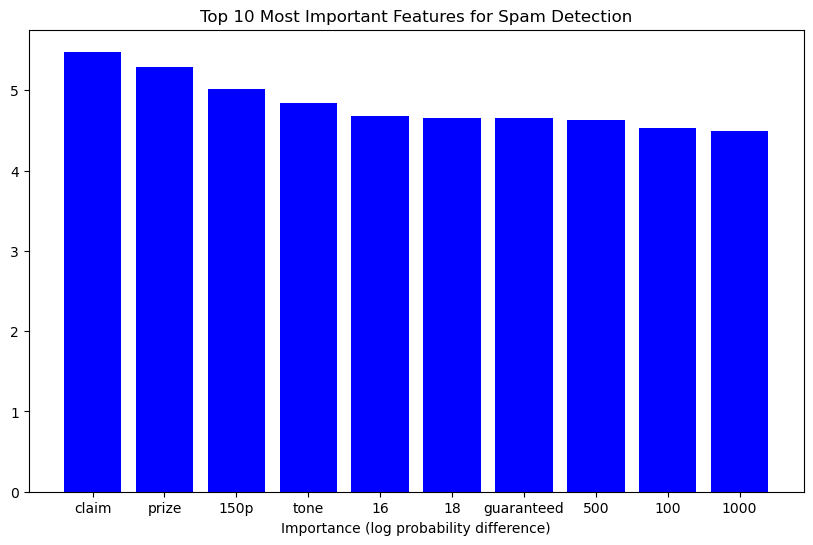

In [48]:

# Access the CountVectorizer step of the pipeline to get the feature names (words)
vectorizer = model.named_steps['countvectorizer']
feature_names = vectorizer.get_feature_names_out()

# Access the MultinomialNB step of the pipeline to get the feature log probabilities
model_1 = model.named_steps['multinomialnb']
log_probabilities = model_1.feature_log_prob_

# Separate the log probabilities for spam and not spam
spam_word_probs = log_probabilities[1]  # Spam class
not_spam_word_probs = log_probabilities[0]  # Not spam class

# Calculate the difference between spam and non-spam probabilities
word_importance = spam_word_probs - not_spam_word_probs

# Create a DataFrame to sort and display the most important features
feature_importance_df = pd.DataFrame({
    'Word': feature_names,
    'Importance': word_importance
})

# Sort by importance (most important words for spam)
top_n = 10  # You can change this value to show more or fewer words
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

# Plot the top N most important features
plt.figure(figsize=(10, 6))
plt.bar(top_features['Word'], top_features['Importance'], color='blue')
plt.xlabel('Importance (log probability difference)')
plt.title(f'Top {top_n} Most Important Features for Spam Detection')
plt.show()

      Metric     Score
0   Accuracy  0.985650
1  Precision  0.960000
2     Recall  0.916031
3   F1 Score  0.937500
4    AUC-ROC  0.975005


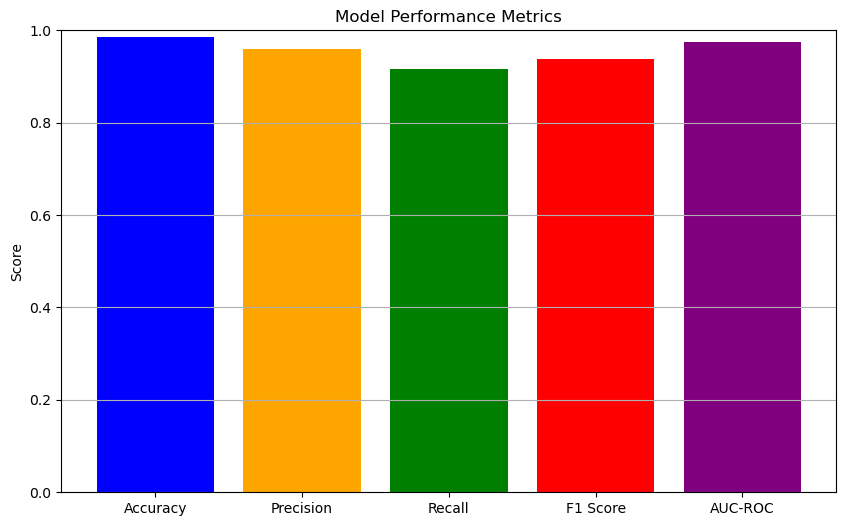

In [51]:
# Calculate metrics
accuracy = accuracy_score(y_test,preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
roc_auc = roc_auc_score(y_test, y_prob)

# Compile metrics into a DataFrame for easier visualization
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Display metrics in a table
print(metrics_df)

# Plot metrics as a multi-bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Metric'], metrics_df['Score'], color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.grid(axis='y')

# Show the plot
plt.show()

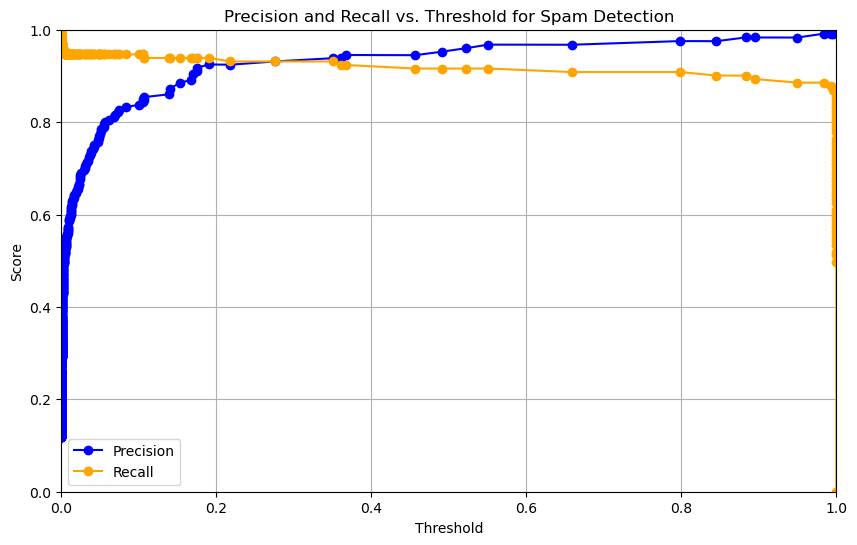

In [58]:
# Calculate precision and recall at different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Create a DataFrame for easier plotting
thresholds = np.append(thresholds, 1.0)  # Append 1 to the thresholds for proper plotting
precision = np.append(precision, precision[-1])  # Append last precision value
recall = np.append(recall, recall[-1])  # Append last recall value

# Plot precision and recall against thresholds
plt.figure(figsize=(10, 6))

# Plot only for valid thresholds
plt.plot(thresholds, precision[:-1], label='Precision', color='blue', marker='o')
plt.plot(thresholds, recall[:-1], label='Recall', color='orange', marker='o')  # Avoid last point
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold for Spam Detection')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axvline(0, color='gray', lw=0.5, ls='--')
plt.legend()
plt.grid()
